In [1]:
import pandas as pd
import quantstats as qs
import pandas_montecarlo
import yfinance as yf

qs.extend_pandas()

## Organización de data

In [2]:
sample = 'Registro_de_operaciones_RoboforexMT5_Noviembre2022.xlsx'

In [3]:
df = pd.read_excel(sample, index_col=0)
df

,Symbol,Type,Volume,Commission,Swap,GrossProfit,Unnamed: 7,Unnamed: 8,Profit,Balance
datetime,,,,,,,,,,
2022.10.31 19:56:27,xxxxxx,xxxx,0.00,0.00,0.0,NaN,0.0,NaN,0.00,30723.47
2022.10.31 19:56:28,EURUSD,sell,0.05,-0.20,0.0,-21.95,NaN,NaN,-22.15,30701.32
2022.11.01 04:22:41,EURUSD,sell,0.07,-0.28,0.0,-8.68,NaN,NaN,-8.96,30692.36
2022.11.01 07:46:07,EURUSD,sell,0.10,-0.40,0.0,10.40,NaN,NaN,10.00,30702.36
2022.11.01 10:05:45,EURUSD,sell,0.14,-0.56,0.0,24.50,NaN,NaN,23.94,30726.30
...,...,...,...,...,...,...,...,...,...,...
2022.11.30 10:53:49,EURUSD,sell,0.12,-0.50,0.0,2.64,NaN,NaN,2.14,32328.81
2022.11.30 11:10:39,EURUSD,sell,0.16,-0.66,0.0,26.08,NaN,NaN,25.42,32354.23
2022.11.30 15:15:07,EURUSD,sell,0.16,-0.66,0.0,44.16,NaN,NaN,43.50,32397.73


In [4]:
df['pct_bal'] = df['Balance'].pct_change()

In [6]:
df.reset_index(inplace=True)

In [7]:
df

,datetime,Symbol,Type,Volume,Commission,Swap,GrossProfit,Unnamed: 7,Unnamed: 8,Profit,Balance,pct_bal
0,2022.10.31 19:56:27,xxxxxx,xxxx,0.00,0.00,0.0,NaN,0.0,NaN,0.00,30723.47,NaN
1,2022.10.31 19:56:28,EURUSD,sell,0.05,-0.20,0.0,-21.95,NaN,NaN,-22.15,30701.32,-0.000721
2,2022.11.01 04:22:41,EURUSD,sell,0.07,-0.28,0.0,-8.68,NaN,NaN,-8.96,30692.36,-0.000292
3,2022.11.01 07:46:07,EURUSD,sell,0.10,-0.40,0.0,10.40,NaN,NaN,10.00,30702.36,0.000326
4,2022.11.01 10:05:45,EURUSD,sell,0.14,-0.56,0.0,24.50,NaN,NaN,23.94,30726.30,0.000780
...,...,...,...,...,...,...,...,...,...,...,...,...
228,2022.11.30 10:53:49,EURUSD,sell,0.12,-0.50,0.0,2.64,NaN,NaN,2.14,32328.81,0.000066
229,2022.11.30 11:10:39,EURUSD,sell,0.16,-0.66,0.0,26.08,NaN,NaN,25.42,32354.23,0.000786
230,2022.11.30 15:15:07,EURUSD,sell,0.16,-0.66,0.0,44.16,NaN,NaN,43.50,32397.73,0.001344
231,2022.11.30 16:14:04,EURUSD,sell,0.06,-0.24,0.0,5.64,NaN,NaN,5.40,32403.13,0.000167


In [9]:
df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d')
df.set_index('datetime', inplace=True)

In [10]:
returns = df['pct_bal']

In [11]:
returns

datetime
2022-10-31 19:56:27         NaN
2022-10-31 19:56:28   -0.000721
2022-11-01 04:22:41   -0.000292
2022-11-01 07:46:07    0.000326
2022-11-01 10:05:45    0.000780
                         ...   
2022-11-30 10:53:49    0.000066
2022-11-30 11:10:39    0.000786
2022-11-30 15:15:07    0.001344
2022-11-30 16:14:04    0.000167
2022-11-30 19:29:00    0.000176
Name: pct_bal, Length: 233, dtype: float64

In [12]:
resampled = returns.resample('D').sum()
resampled

datetime
2022-10-31   -0.000721
2022-11-01    0.002514
2022-11-02    0.005815
2022-11-03    0.003018
2022-11-04    0.001576
2022-11-05    0.000000
2022-11-06    0.000000
2022-11-07    0.001209
2022-11-08    0.000079
2022-11-09    0.001241
2022-11-10    0.001492
2022-11-11    0.002455
2022-11-12    0.000000
2022-11-13    0.000000
2022-11-14    0.002005
2022-11-15    0.003430
2022-11-16    0.002855
2022-11-17    0.000963
2022-11-18    0.002313
2022-11-19    0.000000
2022-11-20    0.000000
2022-11-21    0.000656
2022-11-22   -0.004914
2022-11-23   -0.002132
2022-11-24    0.013918
2022-11-25    0.002401
2022-11-26    0.000000
2022-11-27    0.000000
2022-11-28    0.007778
2022-11-29    0.004166
2022-11-30    0.001567
Freq: D, Name: pct_bal, dtype: float64

## Aplico con columna Balance

In [14]:
qs.reports.html(resampled, 'EURUSD=X', output='Recolección de datos/Noviembre2022/DA_vs_EURUSD.html', title='DA_vs_EURUSD')

## Montecarlo

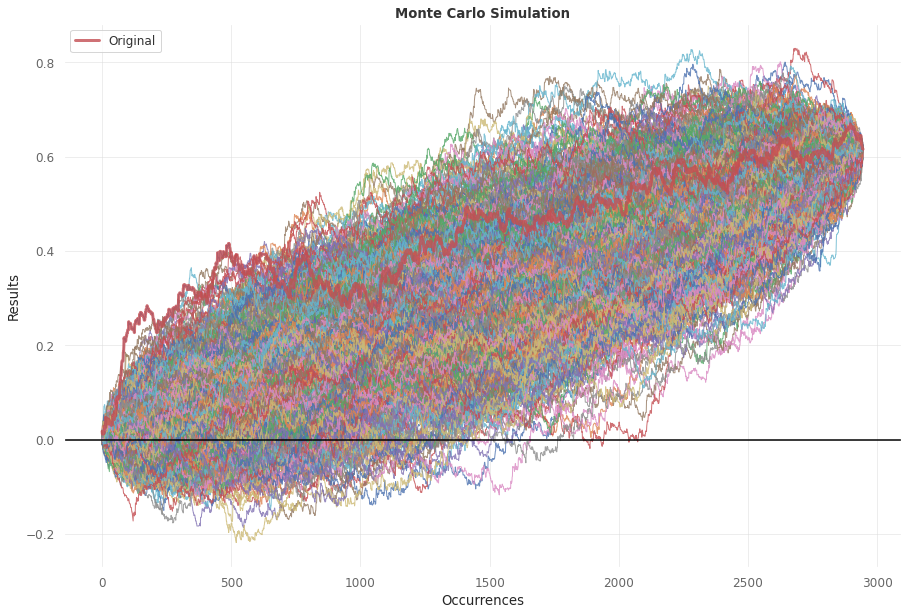

{'min': 0.615430824905708,
 'max': 0.615430824905708,
 'mean': 0.6154308249057183,
 'median': 0.615430824905708,
 'std': 1.0330240541210672e-14,
 'maxdd': -0.2185026247551367,
 'bust': 0.136,
 'goal': 0.0}

In [17]:
mc = resampled.montecarlo(sims = 1000, bust = -0.08, goal = 1)
mc.plot(title = 'Monte Carlo Simulation', figsize = (15,10))
mc.stats